Lets start by comparing the class distribution in the dataset and in our clips


In [2]:
from train import *

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:

import os
import json
from collections import defaultdict
DATASET_PATH = "/workspace/facts/Olympic Boxing Punch Classification Video Dataset"

# Measure the class distribution in the dataset

# Look in dataset
# for each task look at annotations and count the labels in the tracks

class_counts = defaultdict(int)

task_paths = os.listdir(DATASET_PATH)
for task_path in task_paths:
    annotation_path = os.path.join(DATASET_PATH, task_path, "annotations.json")
    annotation_data = json.load(open(annotation_path))[0]
    print(len(json.load(open(annotation_path))))
    for track in annotation_data['tracks']:
        label = POLISH_TO_ENGLISH[track['label']]
        class_counts[label] += 1

tuples = [(label, count) for label, count in class_counts.items()]
tuples.sort(key=lambda x: x[1], reverse=True)
tuples

sum(class_counts.values())

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


4609

Now lets see what our undersampling distribution is going to look like


In [19]:
from sklearn.utils.class_weight import compute_class_weight

train_labels = [LABEL2ID[path.split("/")[-2]] for path in BoxingDataset.train_paths]
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(LABEL2ID)),
    y=np.array(train_labels)  # Ensure it's a numpy array
)
# class_weights = torch.tensor(class_weights, dtype=torch.float32)
class_weights

array([0.34254092, 0.69125375, 0.7842845 , 1.28238162, 1.59852431,
       3.24207746, 2.98944805, 3.21940559])

In [47]:
labels = [LABEL2ID[path.split("/")[-2]] for path in BoxingDataset.train_paths]
labels

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [48]:
labels = np.array(labels)
class_counts = np.bincount(labels)
class_counts[labels]

array([ 143,  143,  143, ..., 1344, 1344, 1344], shape=(3683,))

In [ ]:
sample_weights = 1.0 / class_counts[labels]
labels

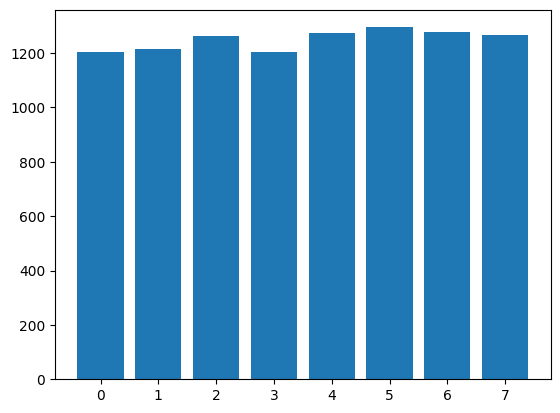

In [37]:
import random
import matplotlib.pyplot as plt
sample_counts = defaultdict(int)
for i in range(10000):
    sampled_idx = random.choices(labels, weights=sample_weights, k=1)[0]
    sample_counts[sampled_idx] += 1

# use matplotlib to plot the distribution

plt.bar(sample_counts.keys(), sample_counts.values())
plt.show()


In [21]:
counts = defaultdict(int)
for path in BoxingDataset.train_paths:
    label = path.split("/")[-2]
    counts[label] += 1

ts = [(label, count) for label, count in counts.items()]
ts.sort(key=lambda x: x[1], reverse=True)
ts




[('LHHP', 1344),
 ('RHHP', 666),
 ('LHMP', 587),
 ('RHMP', 359),
 ('LHBlP', 288),
 ('LHBP', 154),
 ('RHBP', 143),
 ('RHBlP', 142)]